# Construction du diagramme de distribution d'un couple acide/base

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt

## À partir de la constante d'équilibre $K_a$

### Expressions des concentrations molaires

Le diagramme de distribution peut être construit à partir des deux relations suivantes :

- La relation de conservation des espèces chimiques qui traduit la répartition de l'entité introduite dans la solution entre la forme acide et la forme basique du couple :
\begin{equation}
    C = [\mathrm{AH}] + [\mathrm{A}^-]
\end{equation}
où $C$ est la concentration molaire totale des formes acide et basique.

- La constante d'acidité du couple $\mathrm{AH}/\mathrm{A}^-$ :
\begin{equation}
    K_a = \dfrac{[\mathrm{A}^-] [\mathrm{H}_3\mathrm{O}^+]}{[\mathrm{AH}]}
\end{equation}

La résolution du système formé par ces deux équations conduit aux expressions suivantes :

\begin{equation}
    [\mathrm{AH}] = \dfrac{C}{1 + \dfrac{K_a}{[\mathrm{H}_3\mathrm{O}^+]}}
\end{equation}

et

\begin{equation}
    [\mathrm{A}^-] = \dfrac{C}{1 + \dfrac{[\mathrm{H}_3\mathrm{O}^+]}{K_a}}
\end{equation}

que l'on peut tracer.

## À partir du $pK_a$

### Expressions des concentrations molaires

Plus simplement (et de façon totalement équivalente), on peut construire le diagramme à partir des deux relations suivantes :

- La relation de conservation des espèces chimiques qui traduit la répartition de l'entité introduite dans la solution entre la forme acide et la forme basique du couple :
\begin{equation}
    C = [\mathrm{AH}] + [\mathrm{A}^-]
\end{equation}

- La relation entre le pH et le $\mathrm{pK}_a$ du couple $\mathrm{AH}/\mathrm{A}^-$ :
\begin{equation}
    \mathrm{pH} = \mathrm{pK}_a + \log \left( \dfrac{[\mathrm{A}^-]}{[\mathrm{AH}]} \right)
\end{equation}

La résolution du système formé par ces deux équations conduit aux expressions suivantes :

\begin{equation}
    [\mathrm{AH}] = \dfrac{C}{1 + 10^{\mathrm{pH} - \mathrm{pK}_a}}
\end{equation}

et

\begin{equation}
    [\mathrm{A}^-] = \dfrac{C}{1 + 10^{\mathrm{pK}_a - \mathrm{pH}}}
\end{equation}

que l'on peut tracer.

### Expressions des pourcentages

À partir des expressions des concentrations molaires, il est facile de montrer que :

\begin{equation}
    \%\mathrm{AH} = \dfrac{100}{1 + 10^{\mathrm{pH} - \mathrm{pK}_a}}
\end{equation}

et

\begin{equation}
    \%\mathrm{A}^- = \dfrac{100}{1 + 10^{\mathrm{pK}_a - \mathrm{pH}}}
\end{equation}

In [3]:
pKa = 9  # pKa du couple acide-base considéré

pH = np.linspace(0, 14, 140)  # Tableau des valeurs du pH

In [4]:
def determination_pourcentages(pH, pKa):
    AH = 100 / (10**(pH - pKa) + 1)
    B = 100 / (10**(pKa - pH) + 1)
    return (AH, B)

In [5]:
p_AH, p_B = determination_pourcentages(pH, pKa)

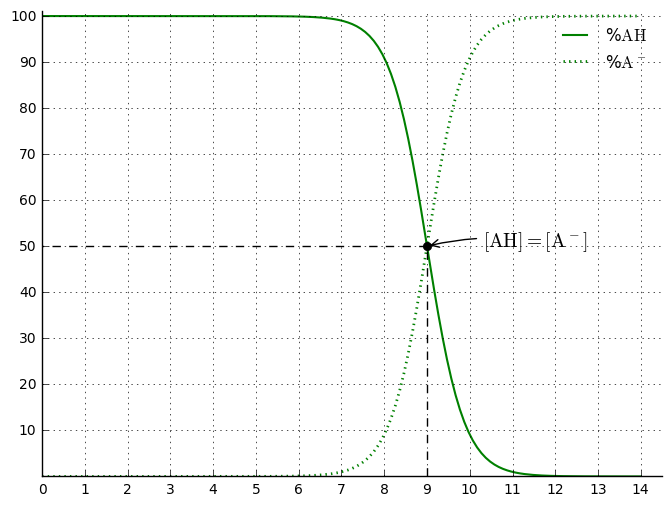

In [6]:
# Création d'une figure de dimensions 8 x 6 points, de densité 100 points par pouce
plt.figure(figsize=(8, 6), dpi=80)

# Création d'une sous-figure
plt.subplot(111)

# Plots
plt.plot(
    pH,
    p_AH,
    color="green",
    linewidth=1.5,
    linestyle='-',
    label=r'%$\mathrm{AH}$')
plt.plot(
    pH, 
    p_B, 
    color="green", 
    linewidth=2, 
    linestyle=':', 
    label=r'%$\mathrm{A}^-$')

# Limites pour l'axe des abscisses
plt.xlim(0, 14.5)
# Limites pour l'axe des ordonnées
plt.ylim(0, 101)

# Marqueurs pour l'axe des abscisses
plt.xticks([x for x in range(15)], [x for x in range(15)])
# Marqueurs pour l'axe des ordonnées
plt.yticks([y for y in range(10, 110, 10)], [y for y in range(10, 110, 10)])

# Choix des positions des axes de référence (4 : bas, haut, droite, gauche)
ax = plt.gca()  # what is the current axe
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Grille
plt.grid()

# Légende
plt.legend(loc='upper right', frameon=False)

# Mise en évidence du pKa à 50%
plt.plot([pKa, pKa], [0, 50], color='black', linewidth=1, linestyle="--")
plt.plot([pKa, 0], [50, 50], color='black', linewidth=1, linestyle="--")
plt.plot([pKa, ], [50, ], color='black', marker='o')

plt.annotate(
    r'$[\mathrm{AH}] = [\mathrm{A}^-]$',
    xy=(pKa, 50),
    xycoords='data',
    xytext=(+40, +0),
    textcoords='offset points',
    fontsize=14,
    arrowprops=dict(
        arrowstyle="->", connectionstyle="arc3,rad=.1"))  # Annotation 1

plt.show()

## Création d'un fichier contenant les valeurs calculées (pour utilisation avec un autre logiciel)

In [7]:
liste_couples = list(zip(pH, AH, B))

with open("diagramme_distribution_AB.txt", 'w') as f:
    for ph, ah, b in liste_couples:
        chaine = "{} {} {}\n".format(ph, ah, b)
        f.write(chaine)

NameError: name 'AH' is not defined